In [79]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb

In [80]:
#reading data using pandas
data = pd.read_csv('Fraud_check (1).csv')

# data understanding

In [81]:
# top 5 data
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [82]:
# shape of the data
data.shape

(600, 6)

In [83]:
# which coumns in this data
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [84]:
# checking data type of all columns
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# information about the data

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# observation
1) we have total 600 values.

2) 3 columns have int type and 3 coumns have object type but in object type 2 columns have categorical columns so we can use lable encoder to cornvert object to int type

3) All columns contains all 600 values as not_null.

4) we will again check for null values using isnull() function.

# handling missing values

In [86]:
# checking null values using isnull() function
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

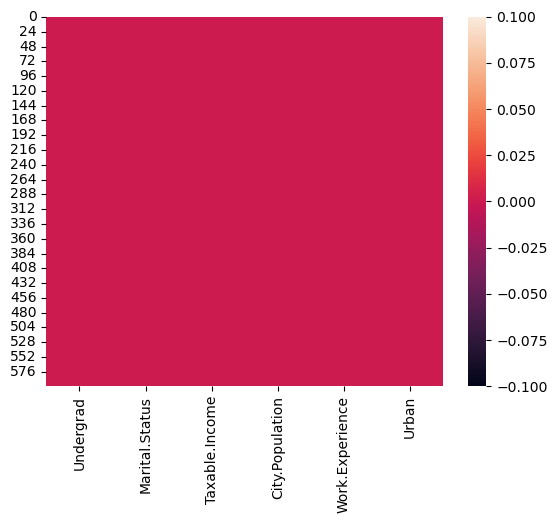

In [87]:
## checking null values using heatmap
import seaborn as sns
sns.heatmap(data.isnull())

there is no missing values in the dataset

In [88]:
# heck for duplicate values
data.duplicated().sum()

0

In [89]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


there is no duplicate values in the dataset


In [90]:
# Summary of the data
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# converting target variable into categorical column

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [91]:
data['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [92]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data1=data.copy()
data1['taxable_category'] = pd.cut(x = data1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [93]:
## checking taxable_category values
data1['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [94]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Undergrad         600 non-null    object  
 1   Marital.Status    600 non-null    object  
 2   Taxable.Income    600 non-null    int64   
 3   City.Population   600 non-null    int64   
 4   Work.Experience   600 non-null    int64   
 5   Urban             600 non-null    object  
 6   taxable_category  600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


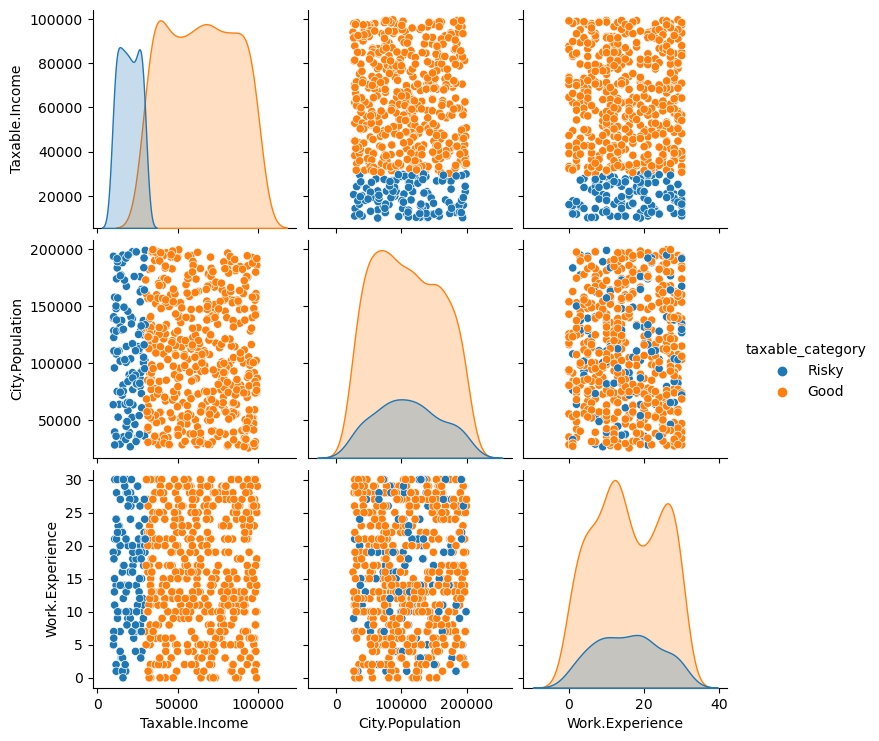

In [95]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=data1, hue = 'taxable_category')

# outliers

In [96]:
# all numeric columns in the dataset
numerical_features = data1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

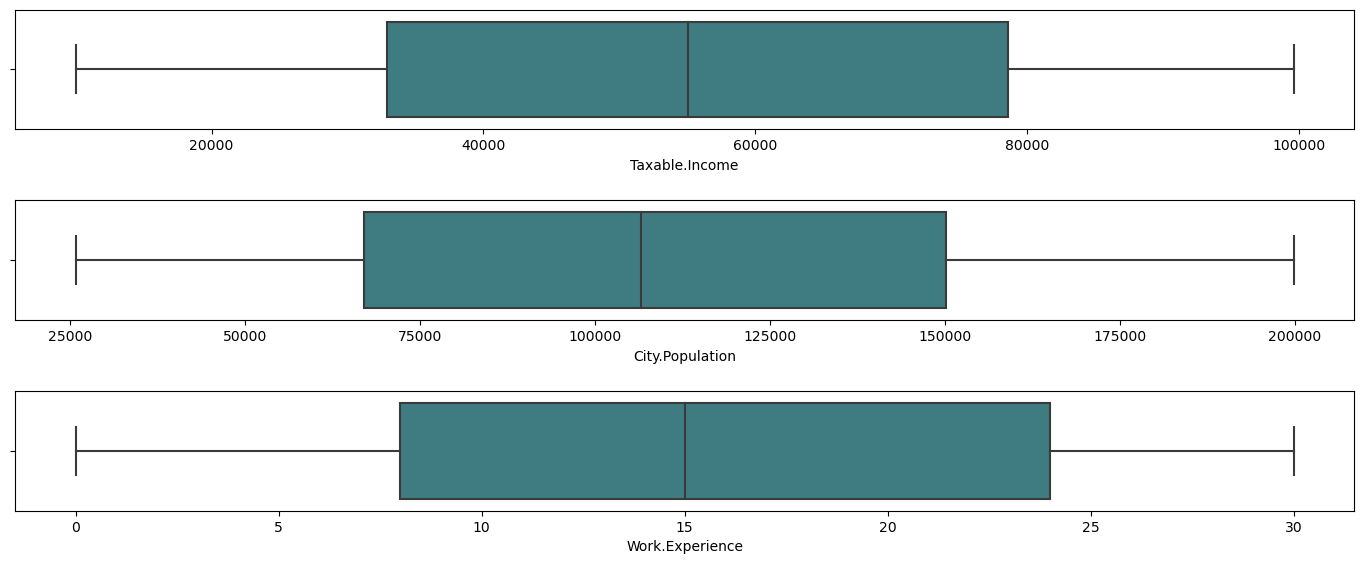

In [97]:
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=data,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=data,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=data,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

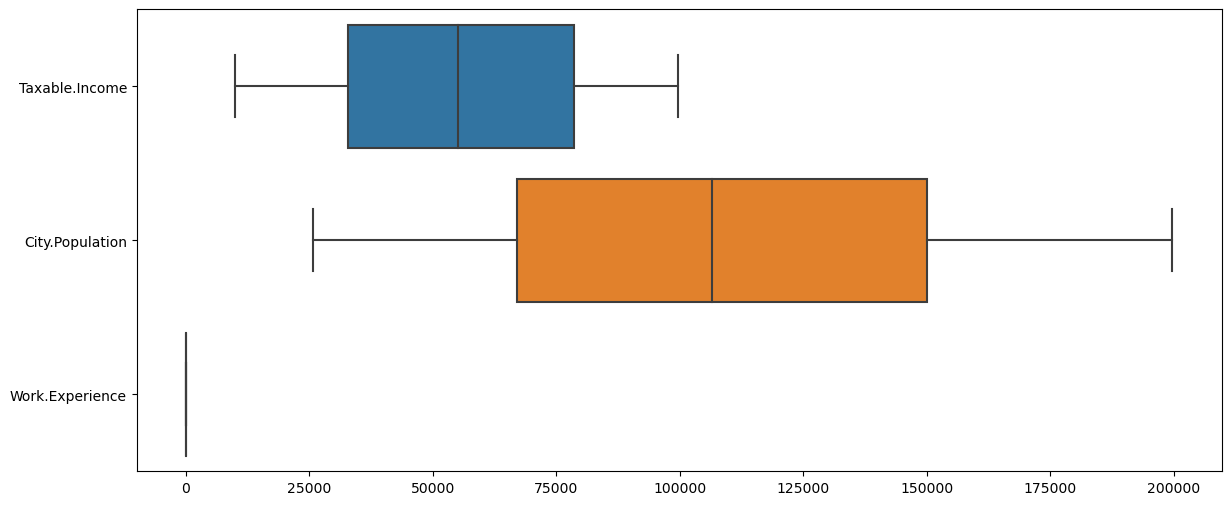

In [98]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=data[numerical_features], orient="h")

# countplot for all categorical columns

In [99]:
categorical_features = data1.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban', 'taxable_category'], dtype='object')

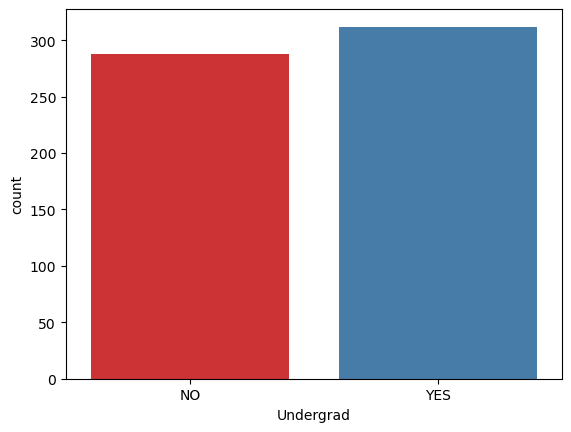

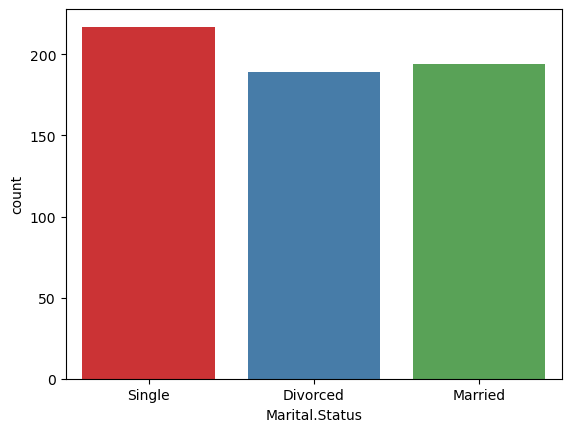

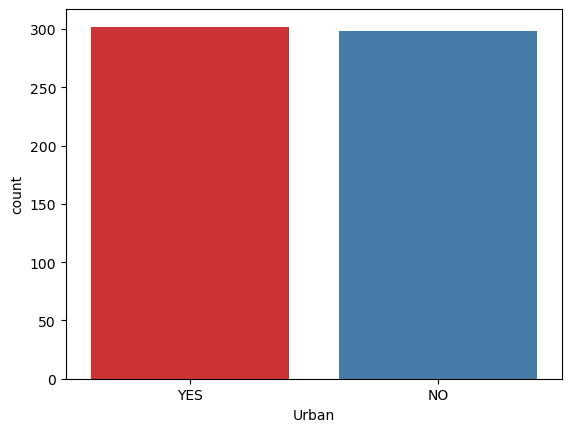

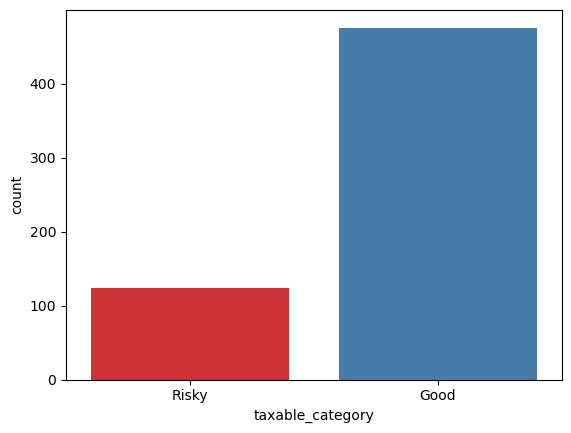

In [100]:
# countplot for sales column
str_column = ['Undergrad', 'Marital.Status', 'Urban', 'taxable_category']
for col in str_column:
    plt.figure()
    sns.countplot(x = col, data = data1, palette = 'Set1');

# correlation matrix

In [101]:
# correlation of numeric variabess
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<function matplotlib.pyplot.show(close=None, block=None)>

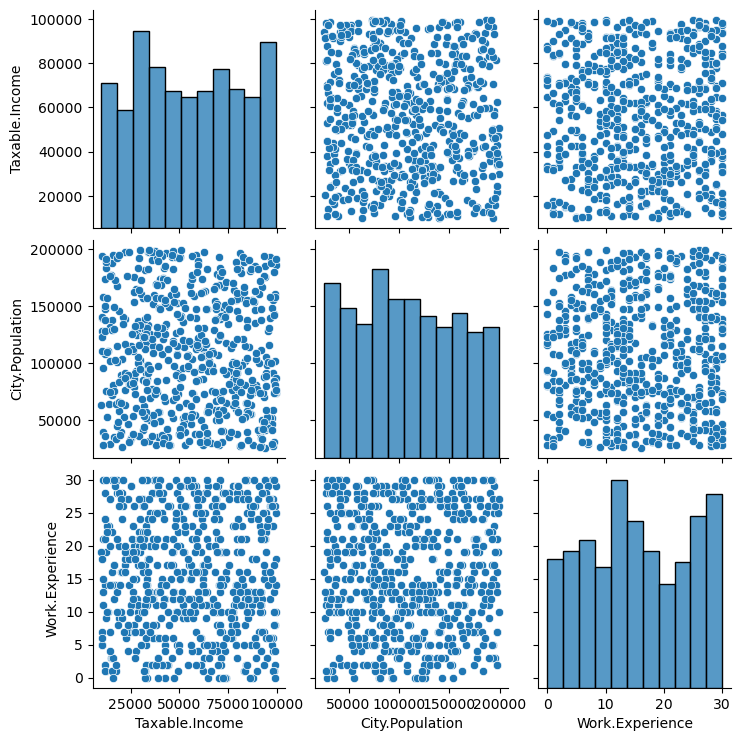

In [102]:
sns.pairplot(data)
plt.show

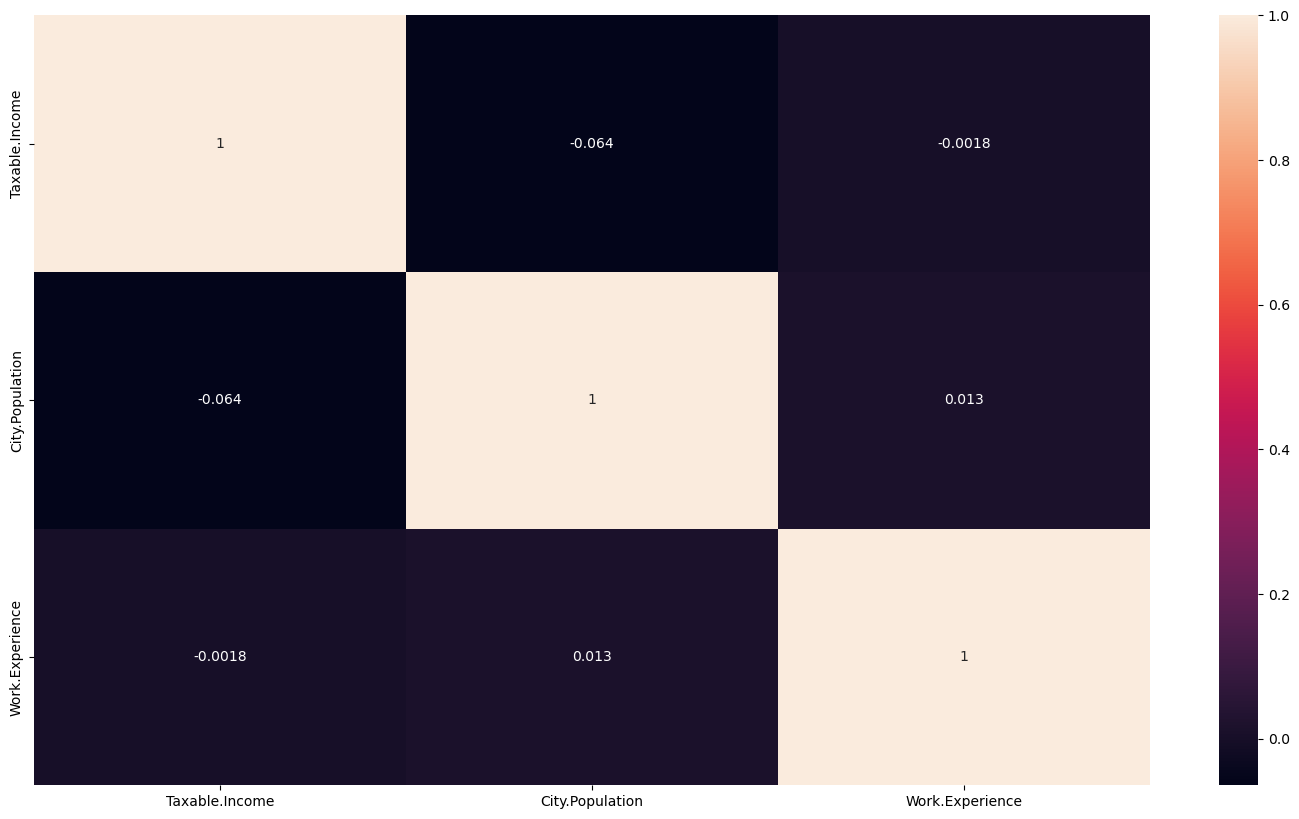

In [103]:
# Having a look at the correlation matrix
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [105]:
# rename the columns
model_data = data1.copy()
model_data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)

In [106]:
model_data.columns


Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban', 'taxable_category'],
      dtype='object')

In [107]:
model_data.drop('Taxable_Income', axis=1, inplace = True)

In [108]:
categorical_features = model_data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [109]:
#Creating dummy vairables of the categorical features
le = LabelEncoder()
for col in categorical_features:
        le.fit(model_data[col])
        model_data[col] = le.transform(model_data[col])
model_data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


# Data Pre-processing for feature Selection

In [110]:
final_data = data1.copy()

In [111]:
# drope taxable income coluumn
final_data.drop('Taxable.Income',axis=1, inplace =True)

In [112]:
# convert categorical object type column into numeric column using one hot encoding
final_data= pd.get_dummies(final_data.iloc[:,:-1])
final_data.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [113]:
# convert categorical object type column into numeric column using one hot encoding
final_data['Taxable_Income'] = data1.taxable_category
final_data.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good


In [114]:
le = LabelEncoder()
le.fit(final_data["Taxable_Income"])
final_data["Taxable_Income"]=le.transform(final_data["Taxable_Income"])
final_data.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
0,50047,10,1,0,0,0,1,0,1,0
1,134075,18,0,1,1,0,0,0,1,0
2,160205,30,1,0,0,1,0,0,1,0
3,193264,15,0,1,0,0,1,0,1,0
4,27533,28,1,0,0,1,0,1,0,0


# Dividing data into independent variables and dependent variable

In [115]:
x = final_data.drop('Taxable_Income',axis=1)
y = final_data['Taxable_Income']

In [116]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [117]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Income, Length: 600, dtype: int32

# Train Test Split

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [120]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from collections import Counter

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 429, 1: 111}) Testing Data Counter({0: 47, 1: 13})


In [121]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (420, 9)
Shape of X_test:  (180, 9)
Shape of y_train:  (420,)
Shape of y_test (180,)


# Model Building Using Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [123]:
pred=model.predict(x_test)

In [124]:
print(np.mean(y_test==pred))

0.7277777777777777


# Model Validation (Confusion Matrix)

In [125]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[130,  13],
       [ 36,   1]], dtype=int64)

In [126]:
test_acc = accuracy_score(y_test,y_pred)
test_acc

0.7277777777777777

In [127]:
y_pred1 = model.predict(x_train)
train_acc = accuracy_score(y_train,y_pred1)
train_acc

1.0

# Optimization Using Grid Search

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
model1=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model1.fit(x,y)

RandomForestClassifier(max_depth=19, max_leaf_nodes=19, n_estimators=1000)

In [130]:
pred=model1.predict(x)
print(np.mean(y==pred))

0.7933333333333333


In [131]:
model1=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=19, max_leaf_nodes=19, n_estimators=1000)

In [132]:
pred=model1.predict(x_train)
print(np.mean(y_train==pred))

0.7952380952380952


# K-Fold Cross Validation

In [133]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [134]:
kfold=KFold(n_splits=10)

In [135]:
results=cross_val_score(model1,x,y,cv=kfold)

In [136]:
print(results.mean())

0.7933333333333332


# Baging

In [137]:
from sklearn.ensemble import BaggingClassifier

In [138]:
model2=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)

In [139]:
model=BaggingClassifier(base_estimator=model2)

In [140]:
results=cross_val_score(model,x,y,cv=kfold)

In [141]:
print(results.mean())

0.7933333333333332


# Boosting

In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
model=AdaBoostClassifier(base_estimator=model1)

In [144]:
results=cross_val_score(model,x,y,cv=kfold)

In [145]:
print(results.mean())

0.75


# XGBM

In [146]:
# XGBoost model for dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [147]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [148]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [149]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [150]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.78%


In [151]:
# evaluate predictions
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


# LGBM

In [152]:
import lightgbm as lgb

In [153]:
d_train = lgb.Dataset(x_train, label=y_train)

In [154]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [155]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 87, number of negative: 333
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207143 -> initscore=-1.342234
[LightGBM] [Info] Start training from score -1.342234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [156]:
#Prediction
y_pred=clf.predict(x_test)

In [157]:
pred = [round(value) for value in y_pred]

In [158]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.7944444444444444

# Final Model

In [159]:
final_model = RandomForestClassifier(n_estimators=500,criterion="gini",max_depth=16)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=16, n_estimators=500)

In [160]:
y_pred = final_model.predict(x_test)

In [161]:
# accuracy score for test data
accuracy_score(y_test,y_pred)

0.7444444444444445